In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
 df = pd.read_csv('/diabetes_prediction_dataset.csv')

In [5]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [6]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [7]:
df.shape

(100000, 9)

In [8]:
df.dtypes

,0
gender,object
age,float64
hypertension,int64
heart_disease,int64
smoking_history,object
bmi,float64
HbA1c_level,float64
blood_glucose_level,int64
diabetes,int64


In [9]:
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [10]:
# Examine the distribution of categorical features
for col in ['gender', 'smoking_history']:
    display(df[col].value_counts())

,count
gender,
Female,58552
Male,41430
Other,18


,count
smoking_history,
No Info,35816
never,35095
former,9352
current,9286
not current,6447
ever,4004


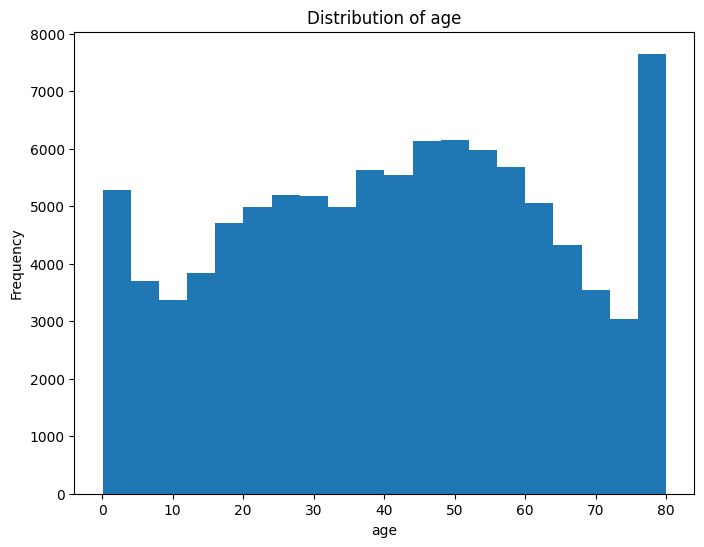

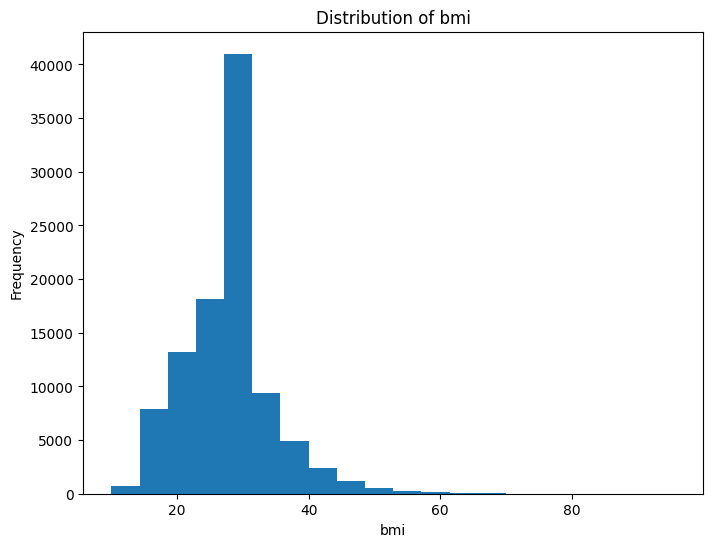

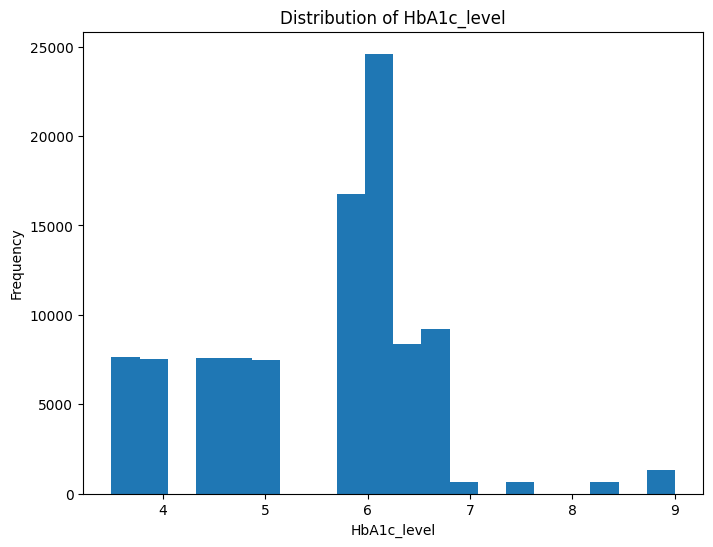

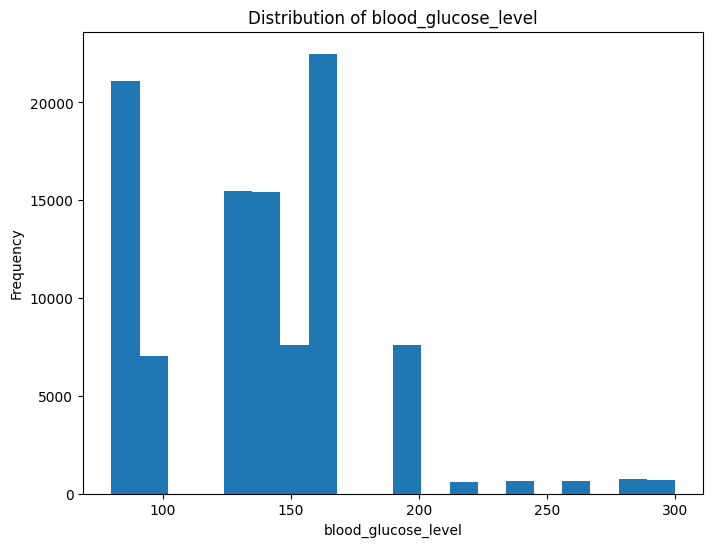

In [11]:
# Visualize the distribution of numerical features and identify potential outliers
numerical_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    plt.hist(df[col], bins=20)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {col}")
    plt.show()

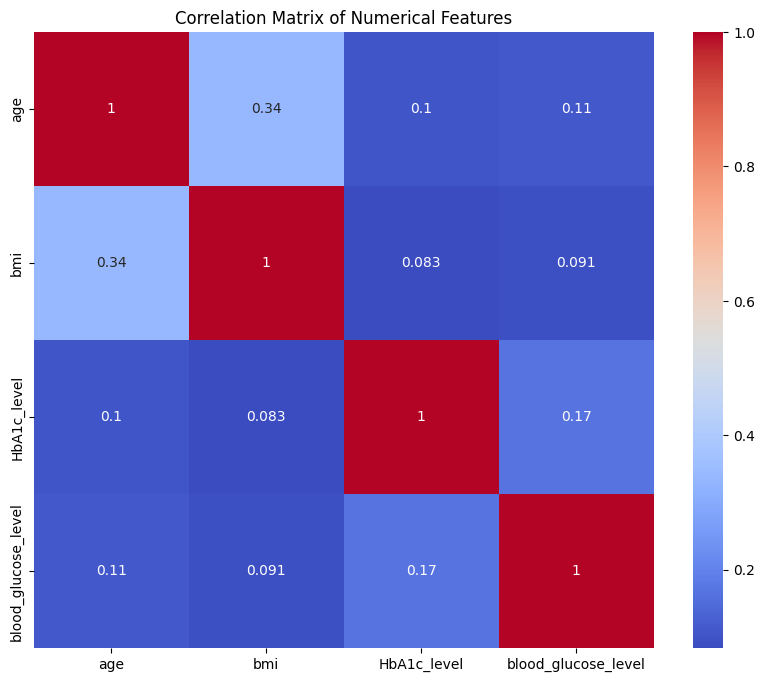

In [12]:
# Calculate and visualize the correlation between numerical features
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Numerical Features")
plt.show()

In [13]:
# Inspect 'gender' column
print(df['gender'].value_counts())

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64


In [14]:
# Replace inconsistent values in 'gender' (if any)
df['gender'] = df['gender'].replace({'Other': 'Female'})

In [15]:
# Examine 'smoking_history'
print(df['smoking_history'].value_counts())

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64


In [16]:
# Handle 'No Info' in 'smoking_history' (replace with most frequent non-missing category)
df['smoking_history'] = df['smoking_history'].replace({'No Info': 'never'})

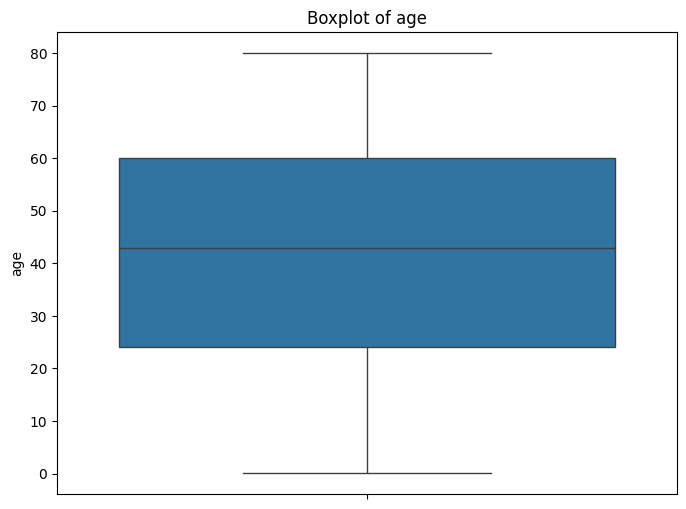

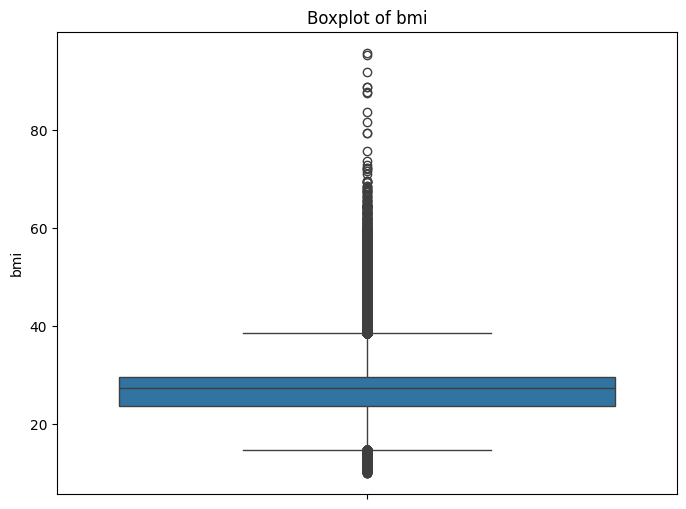

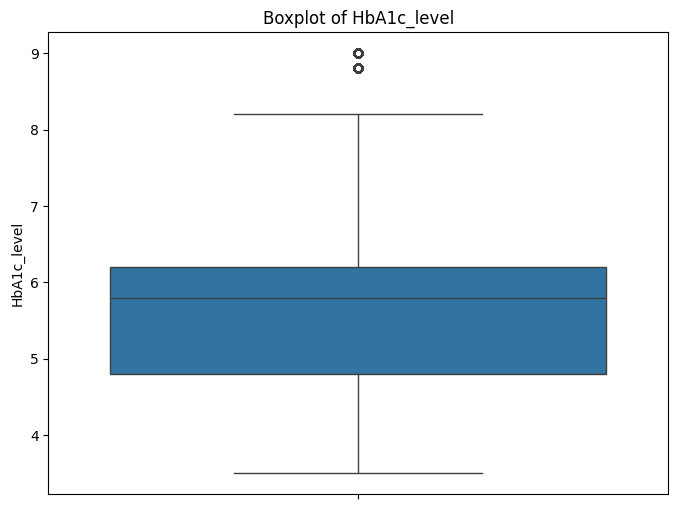

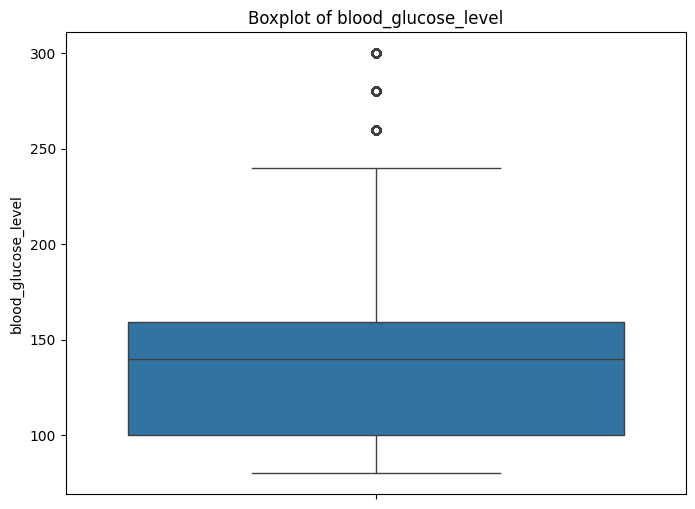

In [17]:
numerical_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
for col in numerical_cols:
  plt.figure(figsize=(8,6))
  sns.boxplot(y=df[col])
  plt.title(f"Boxplot of {col}")
  plt.show()

In [18]:
# Handle outliers in numerical features using IQR
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

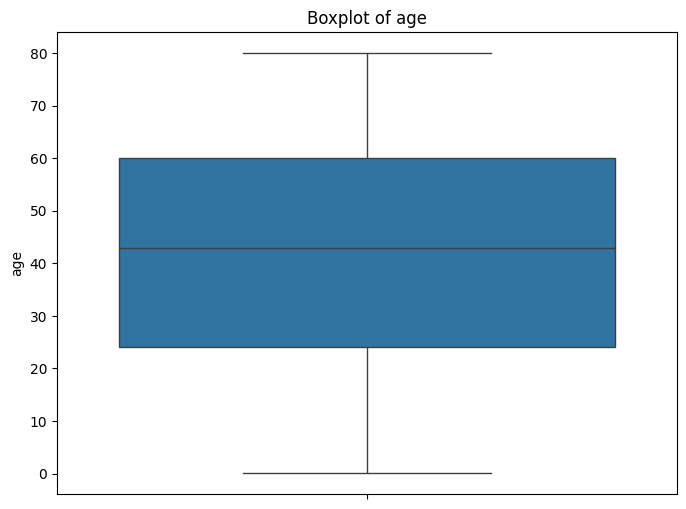

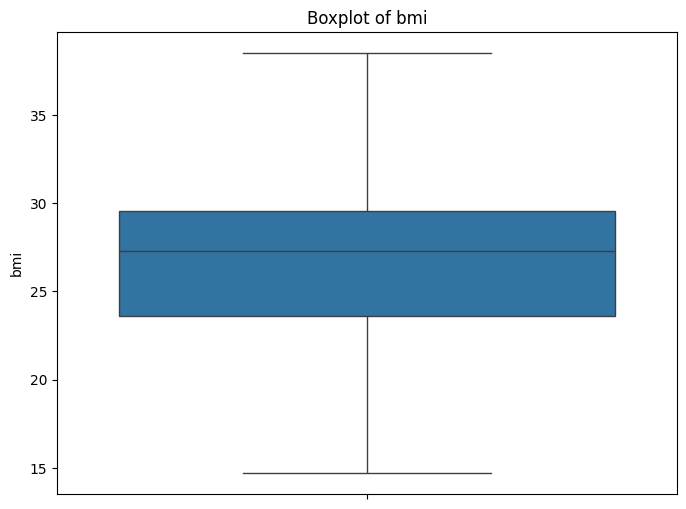

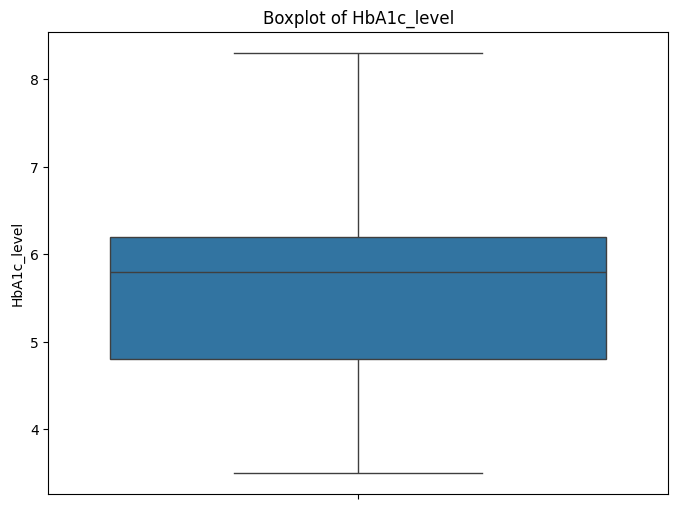

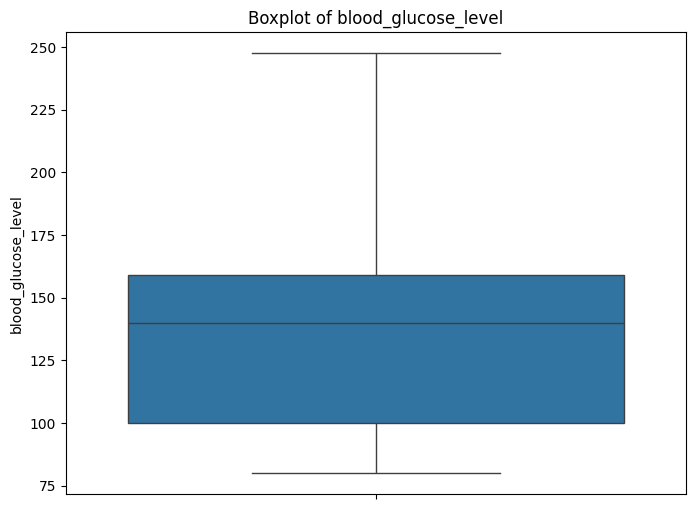

In [19]:
numerical_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
for col in numerical_cols:
  plt.figure(figsize=(8,6))
  sns.boxplot(y=df[col])
  plt.title(f"Boxplot of {col}")
  plt.show()

In [20]:
# df.to_csv("diabetes_dataset(cleaned).csv", index=False)

In [21]:
# One-hot encode 'gender' and 'smoking_history'
df = pd.get_dummies(df, columns=['gender', 'smoking_history'], drop_first=True, dtype='int32')

In [22]:
df.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140.0,0,0,0,0,1,0
1,54.0,0,0,27.32,6.6,80.0,0,0,0,0,1,0
2,28.0,0,0,27.32,5.7,158.0,0,1,0,0,1,0
3,36.0,0,0,23.45,5.0,155.0,0,0,0,0,0,0
4,76.0,1,1,20.14,4.8,155.0,0,1,0,0,0,0


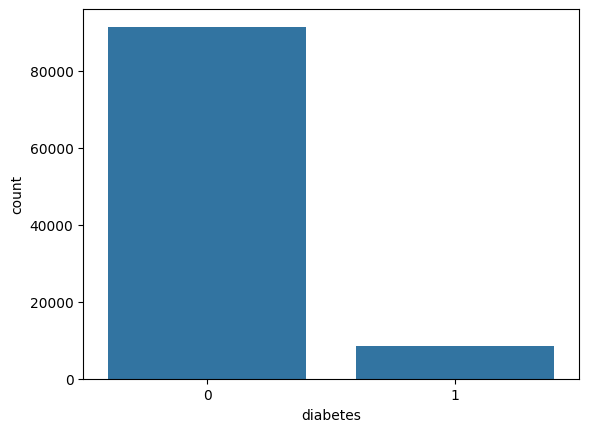

In [23]:
sns.countplot(x='diabetes', data=df)
plt.show()

In [24]:
# Separate features (X) and target variable (y)
X = df.drop('diabetes', axis=1)
y = df['diabetes']

In [25]:
# Apply SMOTE for oversampling the minority class
smp = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = smp.fit_resample(X, y)

# # Check the class distribution after resampling
print("Class distribution before SMOTE:")
print(y.value_counts())

print("\nClass distribution after SMOTE:")
print(y_resampled.value_counts())

Class distribution before SMOTE:
diabetes
0    91500
1     8500
Name: count, dtype: int64

Class distribution after SMOTE:
diabetes
0    8500
1    8500
Name: count, dtype: int64


In [26]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

In [27]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [28]:
y_pred_rf = rf_model.predict(X_test)
print("Training Accuracy:", accuracy_score(y_train, rf_model.predict(X_train)))
print(" Testing Accuracy: ", accuracy_score(y_test, y_pred_rf))

Training Accuracy: 0.9983823529411765
 Testing Accuracy:  0.905


In [29]:
print("Classification Report of Random Forest")
print(classification_report(y_test, y_pred_rf))

Classification Report of Random Forest
              precision    recall  f1-score   support

           0       0.90      0.91      0.91      1700
           1       0.91      0.90      0.90      1700

    accuracy                           0.91      3400
   macro avg       0.91      0.91      0.90      3400
weighted avg       0.91      0.91      0.90      3400



**Gradient Boosting Has Higher Acccuracy 91.3%**

,0,1,accuracy,macro avg,weighted avg
precision,0.8554,0.8617,0.8585,0.8586,0.8586
recall,0.8629,0.8541,0.8585,0.8585,0.8585
f1-score,0.8592,0.8579,0.8585,0.8585,0.8585
support,1700.0000,1700.0000,0.8585,3400.0000,3400.0000


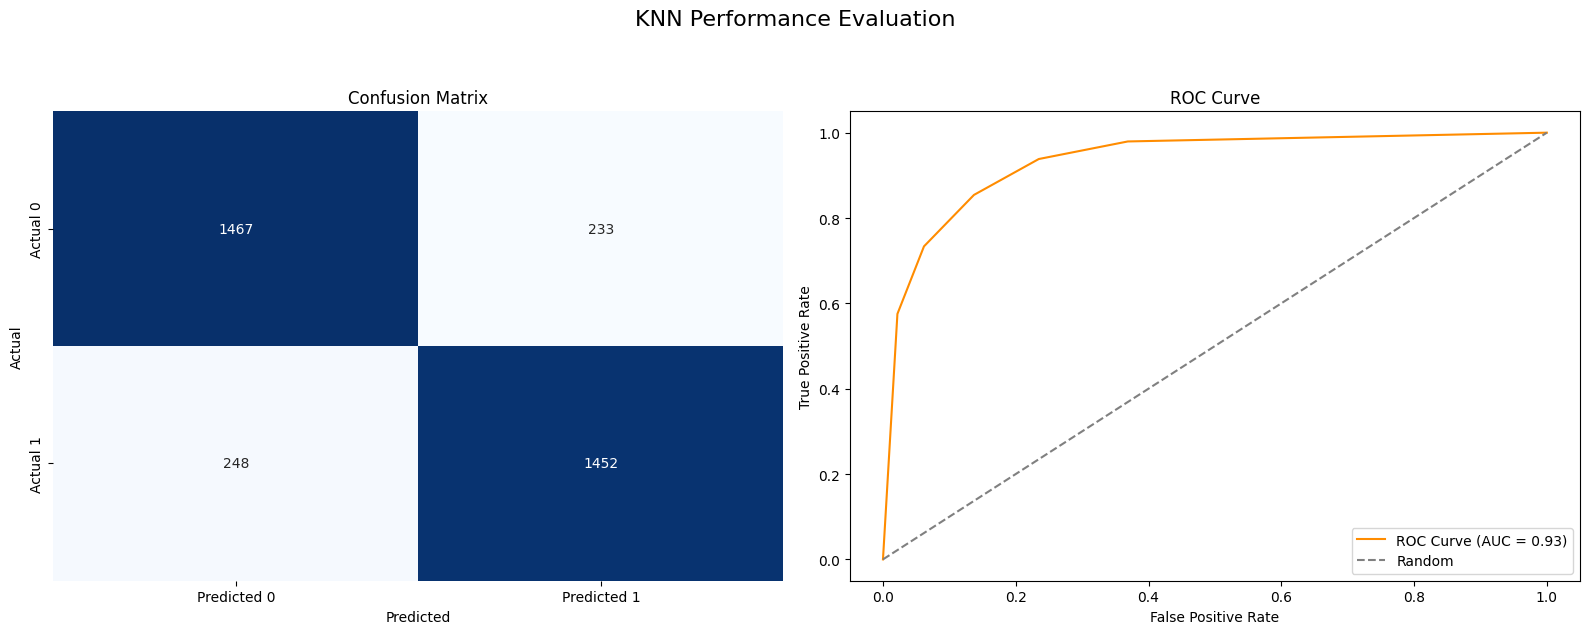

,0,1,accuracy,macro avg,weighted avg
precision,0.8850,0.8909,0.8879,0.8880,0.8880
recall,0.8918,0.8841,0.8879,0.8879,0.8879
f1-score,0.8884,0.8875,0.8879,0.8879,0.8879
support,1700.0000,1700.0000,0.8879,3400.0000,3400.0000


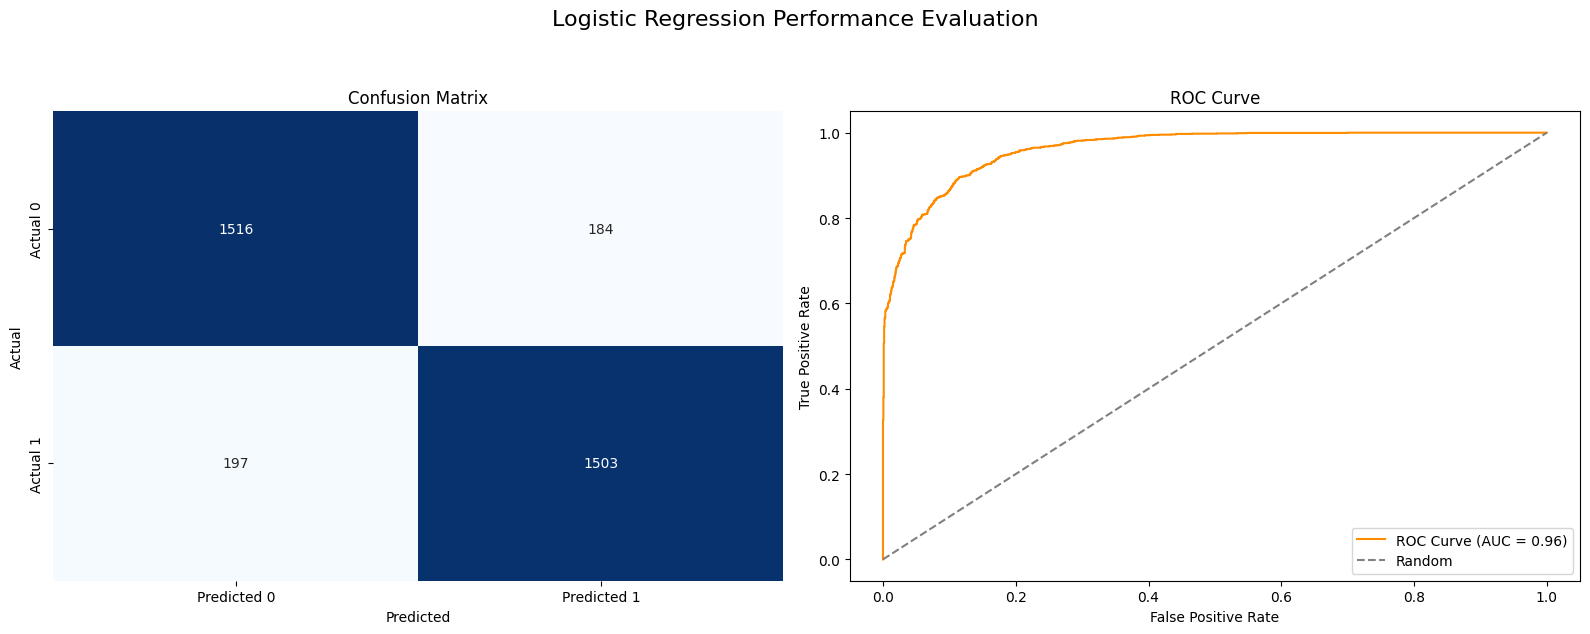

,0,1,accuracy,macro avg,weighted avg
precision,0.8045,0.8574,0.8288,0.8309,0.8309
recall,0.8688,0.7888,0.8288,0.8288,0.8288
f1-score,0.8354,0.8217,0.8288,0.8285,0.8285
support,1700.0000,1700.0000,0.8288,3400.0000,3400.0000


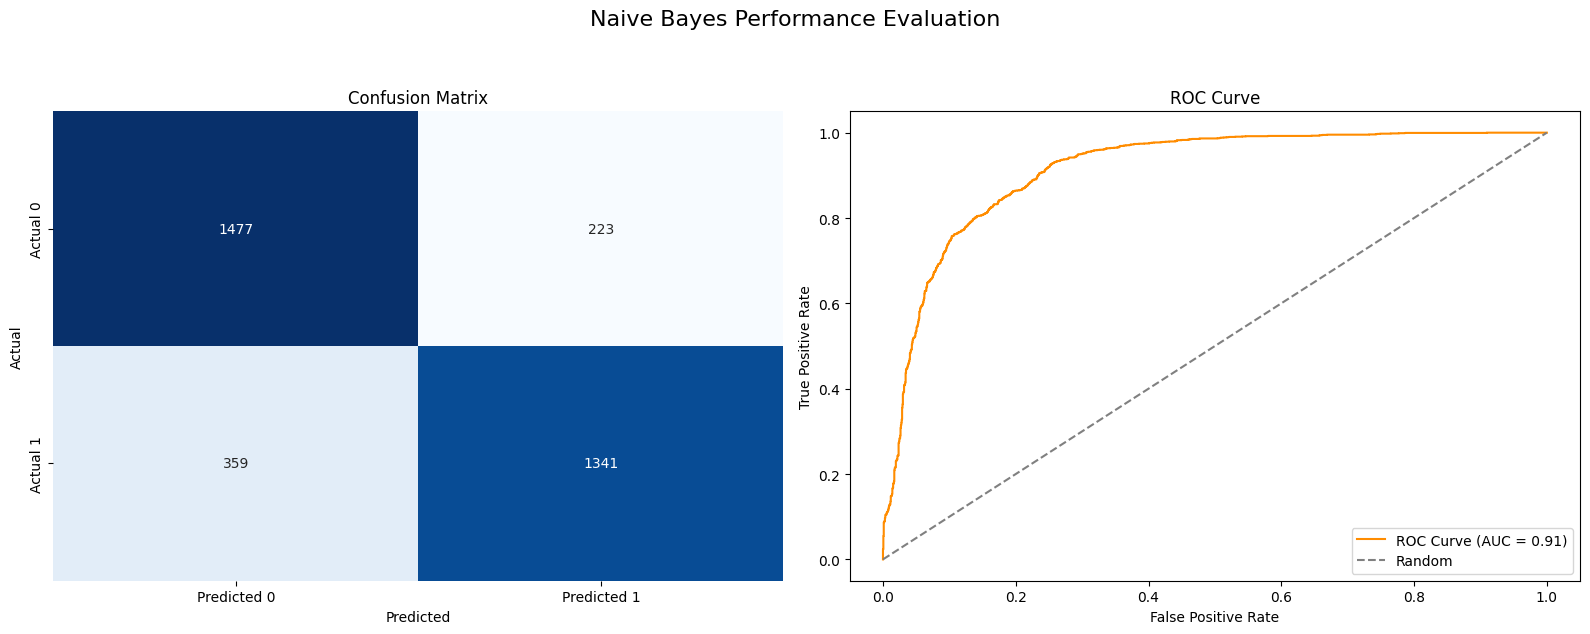

,0,1,accuracy,macro avg,weighted avg
precision,0.9140,0.9125,0.9132,0.9132,0.9132
recall,0.9124,0.9141,0.9132,0.9132,0.9132
f1-score,0.9132,0.9133,0.9132,0.9132,0.9132
support,1700.0000,1700.0000,0.9132,3400.0000,3400.0000


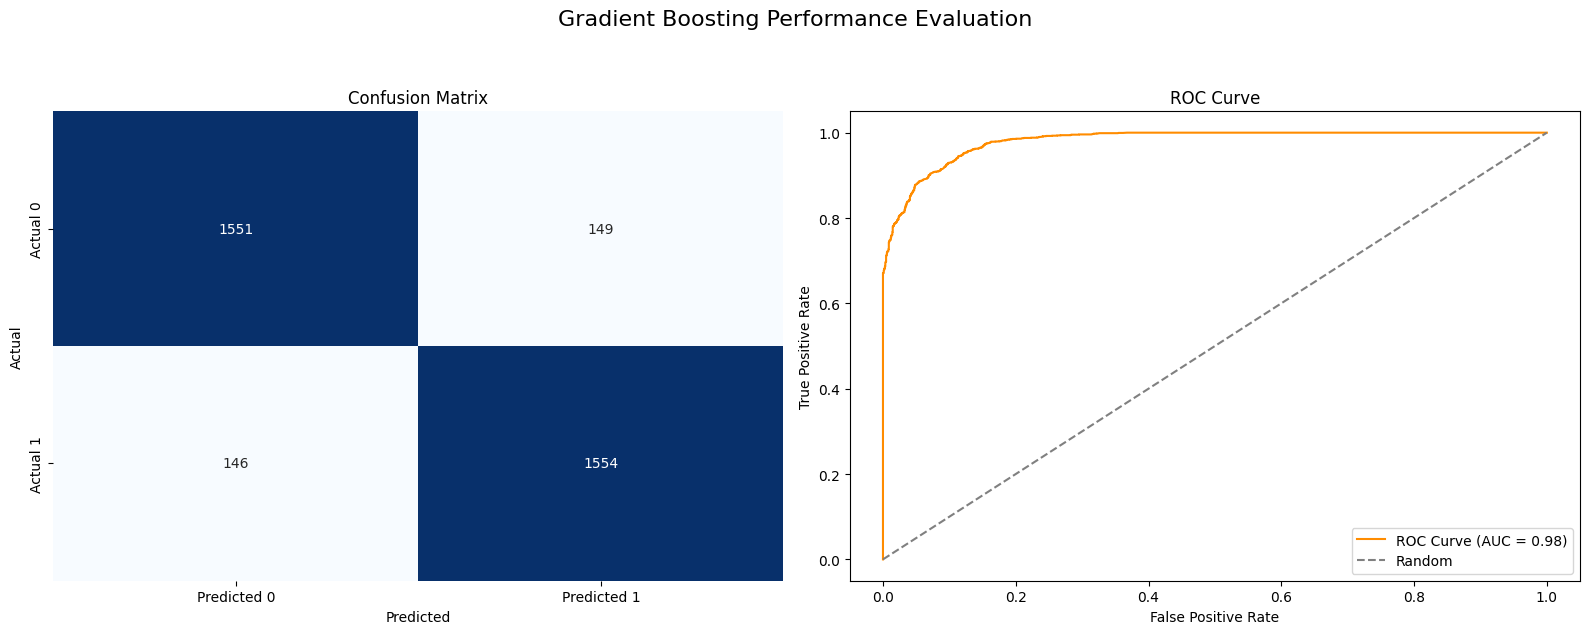

,0,1,accuracy,macro avg,weighted avg
precision,0.9132,0.9103,0.9118,0.9118,0.9118
recall,0.9100,0.9135,0.9118,0.9118,0.9118
f1-score,0.9116,0.9119,0.9118,0.9118,0.9118
support,1700.0000,1700.0000,0.9118,3400.0000,3400.0000


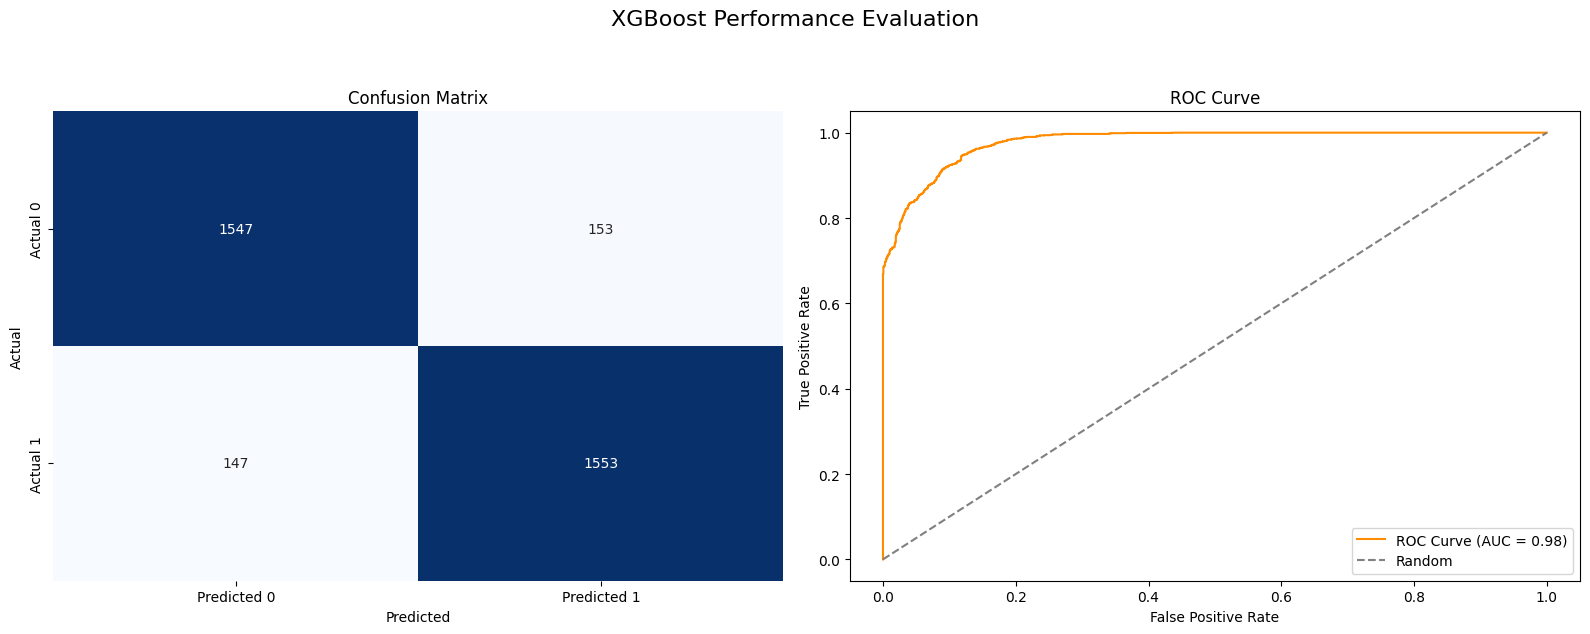

,Model,Training Accuracy,Testing Accuracy,Precision,Recall,F1-Score,ROC AUC,Fit Status
3,Gradient Boosting,0.916324,0.913235,0.913237,0.913235,0.913235,0.980420,Well-Generalized
4,XGBoost,0.952941,0.911765,0.911770,0.911765,0.911764,0.978221,Well-Generalized
1,Logistic Regression,0.881838,0.887941,0.887964,0.887941,0.887940,0.962545,Well-Generalized
0,KNN,0.904853,0.858529,0.858557,0.858529,0.858527,0.932990,Well-Generalized
2,Naive Bayes,0.823750,0.828824,0.830942,0.828824,0.828549,0.912797,Well-Generalized


In [39]:
from IPython.display import display, HTML

def evaluate_models(X_train, y_train, X_test, y_test, models=None):
    """
    Evaluate multiple machine learning models and generate beautiful reports with visualizations.
    Also identifies whether models overfit, underfit, or are well-generalized.

    Parameters:
    X_train, y_train: Training data
    X_test, y_test: Test data
    models: Dictionary of models to evaluate (if None, uses default set)

    Returns:
    DataFrame with model performance metrics
    """

    # Default models if none provided
    if models is None:
        models = {
            "KNN": KNeighborsClassifier(),                    # White Box
            "Logistic Regression": LogisticRegression(max_iter=1000),  # White Box
            "Naive Bayes": GaussianNB(),                      # White Box
            "Gradient Boosting": GradientBoostingClassifier(),# Black Box
            "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),  # Black Box
        }

    black_box_models = {"Gradient Boosting", "XGBoost"}
    white_box_models = {"KNN", "Logistic Regression", "Naive Bayes"}

    results = []

    # Add custom CSS style for classification report
    display(HTML("""
        <style>
            .report-table {
                color: #222;
                background-color: white;
                border-collapse: collapse;
                width: 100%;
            }
            .report-table th {
                background-color: #2e6c80;
                color: white;
                padding: 8px;
                text-align: center;
            }
            .report-table td {
                color: #4682b4;
                padding: 8px;
                text-align: center;
                border: 1px solid #ddd;
            }
        </style>
    """))

    display(HTML("<h1 style='color:#2e6c80; text-align:center;'>Machine Learning Model Evaluation Report</h1>"))
    display(HTML("<hr style='border:2px solid #2e6c80'>"))

    for name, model in models.items():
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else [0]*len(y_test)

        training_accuracy = accuracy_score(y_train, model.predict(X_train))
        testing_accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, output_dict=True)
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)

        # Check for overfitting or underfitting
        fit_status = "Well-Generalized"
        if training_accuracy - testing_accuracy > 0.1:
            fit_status = "Overfitting"
        elif testing_accuracy - training_accuracy > 0.1:
            fit_status = "Underfitting"

        model_type = "Black Box Model" if name in black_box_models else "White Box Model"

        results.append({
            'Model': name,
            'Training Accuracy': training_accuracy,
            'Testing Accuracy': testing_accuracy,
            'Precision': report['weighted avg']['precision'],
            'Recall': report['weighted avg']['recall'],
            'F1-Score': report['weighted avg']['f1-score'],
            'ROC AUC': roc_auc,
            'Fit Status': fit_status
        })

        # Styled Report
        display(HTML(f"""
            <div style='background-color:#f0f8ff; padding:15px; border-radius:10px; margin-bottom:20px;'>
                <h2 style='color:#2e6c80;'>{name} Evaluation</h2>
                <h4 style='color:#444; font-style:italic; margin-top:-10px;'>{model_type}</h4>
                <h3 style='color:#4682b4;'>Classification Metrics</h3>
                {pd.DataFrame(report).round(4).to_html(classes='report-table')}
                <div style="margin-top:10px; font-size:16px; color:#2e6c80;">
                    <strong>Training Accuracy:</strong> {training_accuracy:.4f} &nbsp; | &nbsp;
                    <strong>Testing Accuracy:</strong> {testing_accuracy:.4f} &nbsp; | &nbsp;
                    <strong>ROC AUC:</strong> {roc_auc:.4f} &nbsp; | &nbsp;
                    <strong>Status:</strong> <span style='font-weight:bold;'>{fit_status}</span>
                </div>
            </div>
        """))

        # Visualization
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
        fig.suptitle(f'{name} Performance Evaluation', fontsize=16, y=1.05)

        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, ax=ax1,
                    xticklabels=['Predicted 0', 'Predicted 1'],
                    yticklabels=['Actual 0', 'Actual 1'])
        ax1.set_title("Confusion Matrix")
        ax1.set_xlabel("Predicted")
        ax1.set_ylabel("Actual")

        ax2.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='darkorange')
        ax2.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
        ax2.set_xlabel("False Positive Rate")
        ax2.set_ylabel("True Positive Rate")
        ax2.set_title("ROC Curve")
        ax2.legend(loc="lower right")

        plt.tight_layout()
        plt.show()
        plt.close()

    results_df = pd.DataFrame(results)
    results_df = results_df.sort_values('Testing Accuracy', ascending=False)

    display(HTML("<h2 style='color:#2e6c80; text-align:center;'>Model Performance Summary</h2>"))

    styled_table = results_df.style \
        .background_gradient(cmap='Blues', subset=['Testing Accuracy', 'ROC AUC']) \
        .set_properties(**{'text-align': 'center', 'border': '1px solid white'}) \
        .set_table_styles([{
            'selector': 'th',
            'props': [
                ('background-color', '#2e6c80'),
                ('color', 'white'),
                ('text-align', 'center')
            ]
        }])

    display(HTML(styled_table.to_html()))

    return results_df

# Usage:
results = evaluate_models(X_train, y_train, X_test, y_test)


In [43]:
def check_overfitting_underfitting(results_df, threshold=0.05):
    """
    Checks each model for signs of overfitting or underfitting based on training vs. testing accuracy.

    Parameters:
    results_df: DataFrame from evaluate_models()
    threshold: Accuracy gap threshold to consider overfitting

    Returns:
    DataFrame with additional column: 'Model Fit Status'
    """
    fit_status = []

    for _, row in results_df.iterrows():
        train_acc = row['Training Accuracy']
        test_acc = row['Testing Accuracy']
        acc_diff = train_acc - test_acc

        if train_acc < 0.75 and test_acc < 0.75:
            status = 'Underfitting'
        elif acc_diff > threshold:
            status = 'Overfitting'
        else:
            status = 'Good Fit'

        fit_status.append(status)

    results_df['Model Fit Status'] = fit_status

    display(HTML("<h2 style='color:#2e6c80; text-align:center;'>Overfitting/Underfitting Analysis</h2>"))
    display(results_df[['Model', 'Training Accuracy', 'Testing Accuracy', 'Model Fit Status']].style
            .applymap(lambda x: 'background-color:#ffa07a' if x == 'Overfitting' else
                      'background-color:#f0e68c' if x == 'Underfitting' else
                      'background-color:#2e8b57', subset=['Model Fit Status']))

    return results_df

# Remove the incorrect indentation from the line below
result_df = check_overfitting_underfitting(results)

,Model,Training Accuracy,Testing Accuracy,Model Fit Status
3,Gradient Boosting,0.916324,0.913235,Good Fit
4,XGBoost,0.952941,0.911765,Good Fit
1,Logistic Regression,0.881838,0.887941,Good Fit
0,KNN,0.904853,0.858529,Good Fit
2,Naive Bayes,0.823750,0.828824,Good Fit


In [44]:
# Hyper Parameter Tunging Of Gradient Descent

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42),
                         param_grid,
                         cv=5,
                         scoring='roc_auc')
grid_search.fit(X_train, y_train)

best_gb_model = grid_search.best_estimator_

In [45]:
best_params = grid_search.best_params_
print(best_params)

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


In [46]:
y_pred = best_gb_model.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test,y_pred))

Accuracy:  0.9144117647058824
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.91      1700
           1       0.91      0.92      0.91      1700

    accuracy                           0.91      3400
   macro avg       0.91      0.91      0.91      3400
weighted avg       0.91      0.91      0.91      3400



,0,1,accuracy,macro avg,weighted avg
precision,0.9186,0.9103,0.9144,0.9145,0.9145
recall,0.9094,0.9194,0.9144,0.9144,0.9144
f1-score,0.9140,0.9148,0.9144,0.9144,0.9144
support,1700.0000,1700.0000,0.9144,3400.0000,3400.0000


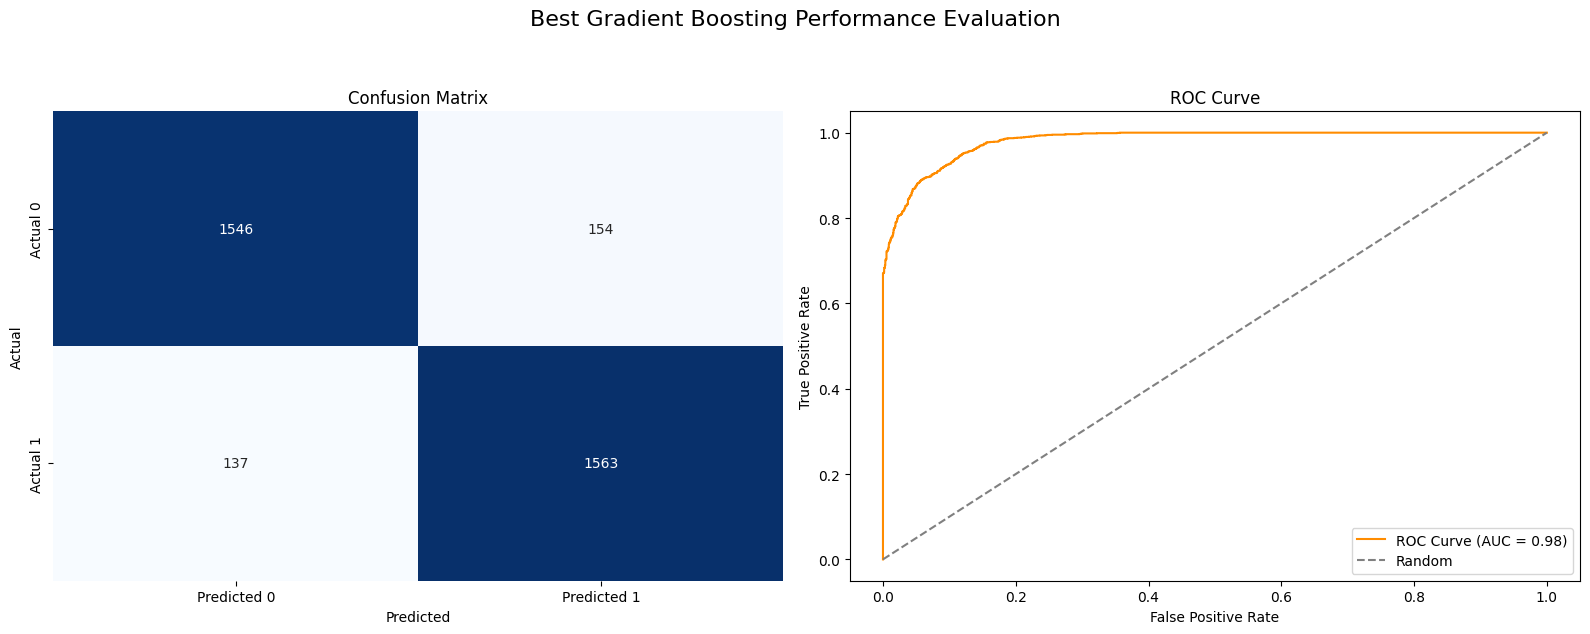

,Model,Training Accuracy,Testing Accuracy,Precision,Recall,F1-Score,ROC AUC,Fit Status
0,Best Gradient Boosting,0.921985,0.914412,0.914453,0.914412,0.914410,0.980743,Well-Generalized


,Model,Training Accuracy,Testing Accuracy,Precision,Recall,F1-Score,ROC AUC,Fit Status
0,Best Gradient Boosting,0.921985,0.914412,0.914453,0.914412,0.91441,0.980743,Well-Generalized


In [48]:
# Define the dictionary containing the best Gradient Boosting model
models_to_evaluate = {"Best Gradient Boosting": best_gb_model}

# Call the evaluate_models function with the dictionary
evaluate_models(X_train, y_train, X_test, y_test, models_to_evaluate)

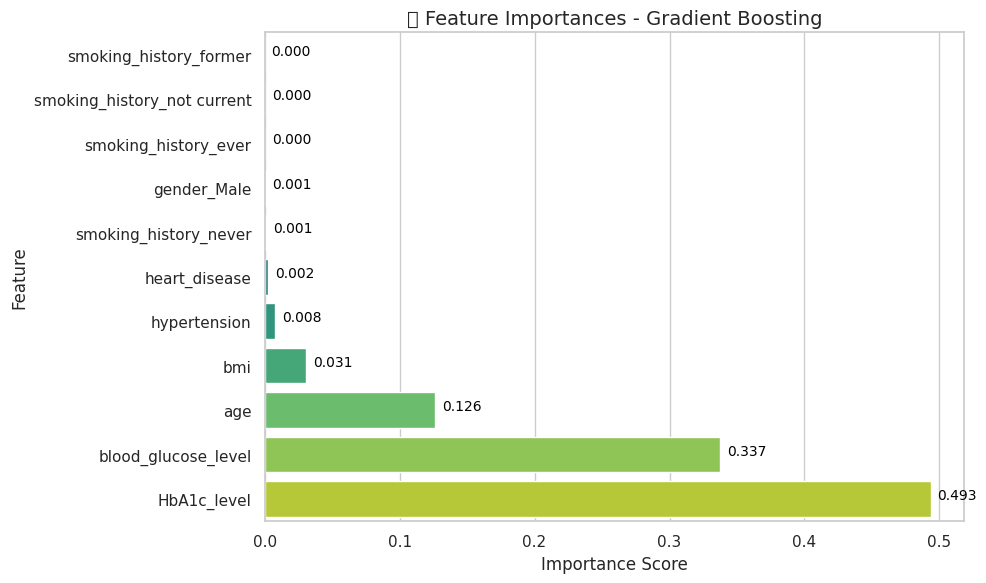

In [49]:
# Create DataFrame of feature importances
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_gb_model.feature_importances_
}).sort_values(by='Importance', ascending=True)  # ascending for horizontal plot

# Plot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
ax = sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')

# Add labels on bars
for i in ax.patches:
    ax.text(i.get_width() + 0.005, i.get_y() + 0.4,
            f'{i.get_width():.3f}', fontsize=10, color='black')

# Final touches
plt.title('🎯 Feature Importances - Gradient Boosting', fontsize=14)
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


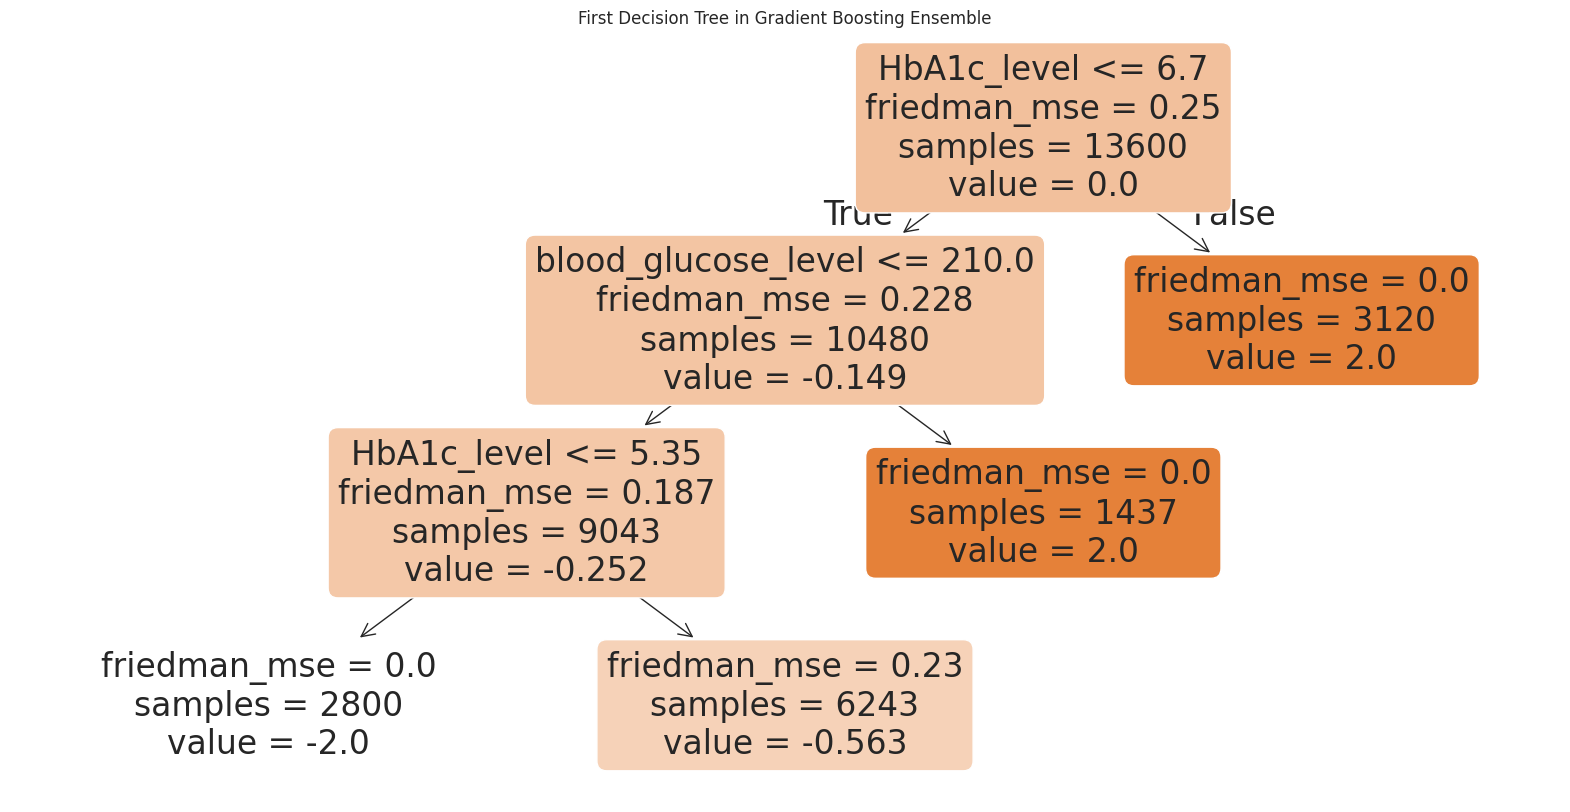

In [50]:
from sklearn.tree import plot_tree

# Plot the first tree in the ensemble
plt.figure(figsize=(20, 10))
plot_tree(best_gb_model.estimators_[0, 0], feature_names=X_train.columns, filled=True, rounded=True)
plt.title("First Decision Tree in Gradient Boosting Ensemble")
plt.show()

In [51]:
import shap

# Create the SHAP explainer
explainer = shap.Explainer(best_gb_model, X_test)

# Compute SHAP values
shap_values = explainer(X_test)

SHAP Summary Plot (Global Feature Importance):


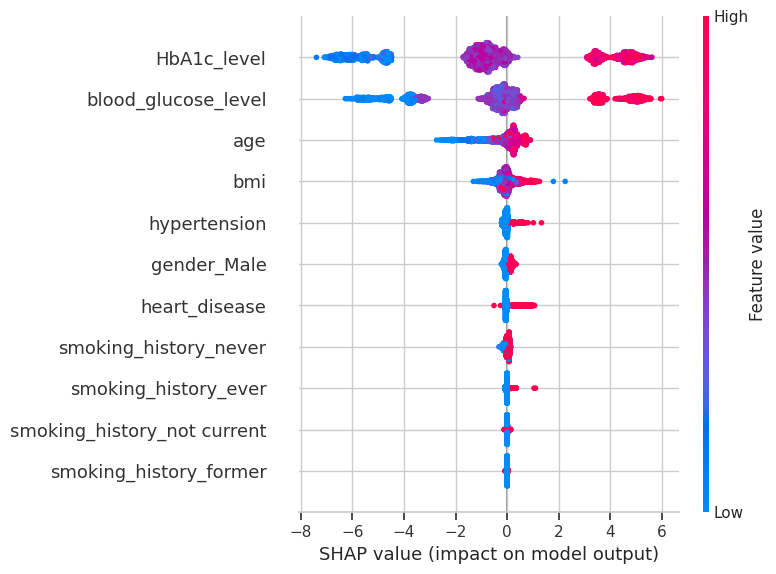

In [52]:
plt.figure(figsize=(8,4))
print("SHAP Summary Plot (Global Feature Importance):")
shap.summary_plot(shap_values, X_test)

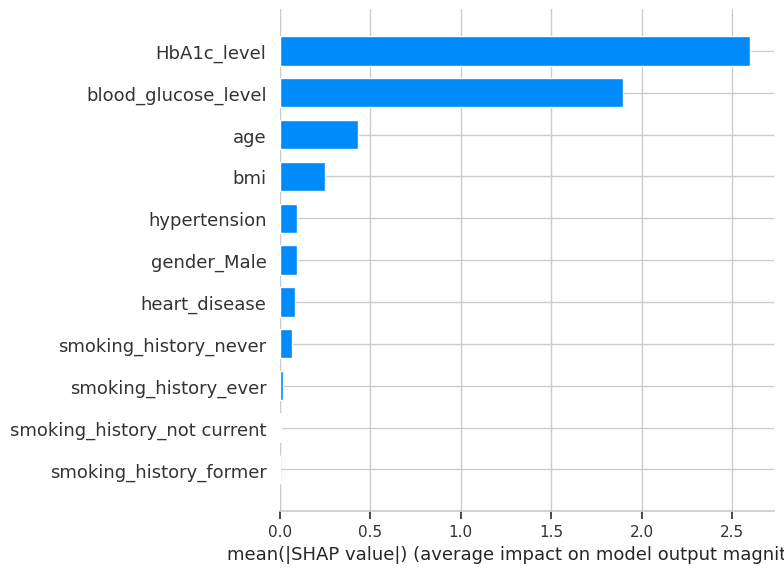

In [53]:
# Feature importance plot
shap.summary_plot(shap_values, X_test, plot_type="bar")

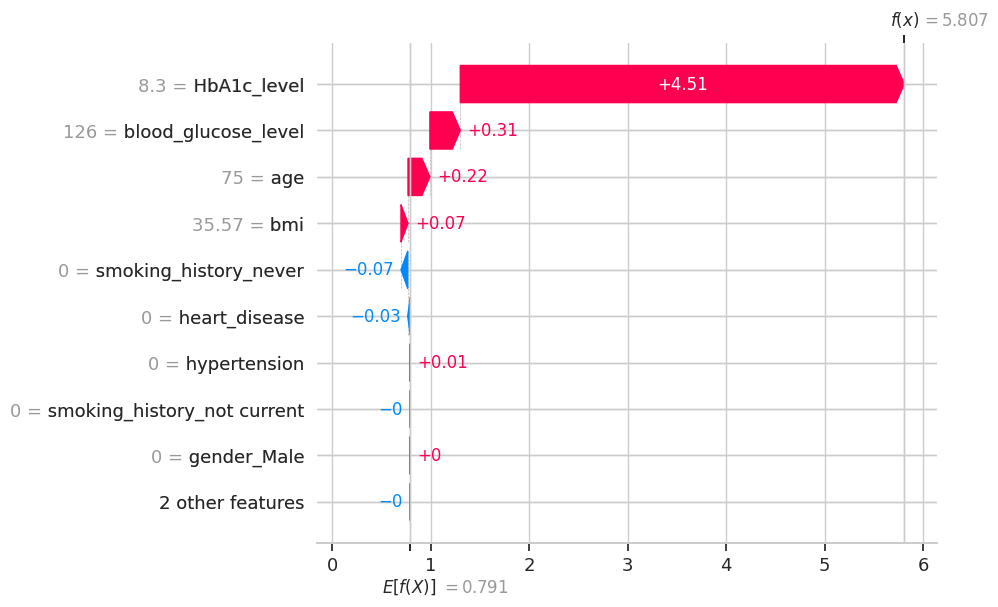

In [54]:
# Generate a waterfall plot for the first instance in the test set
shap.waterfall_plot(shap_values[0])

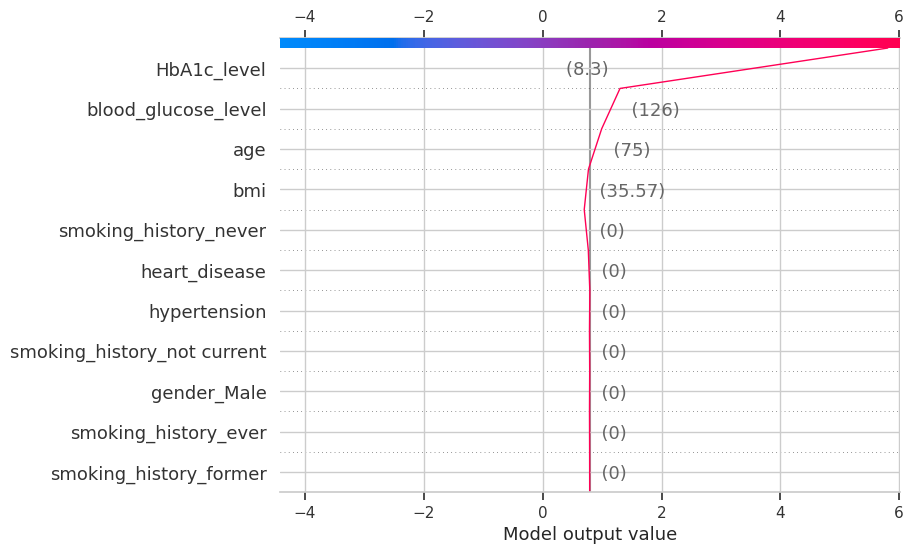

In [55]:
# Example: decision plot for the first instance
shap.decision_plot(explainer.expected_value, shap_values[0].values, X_test.iloc[0])

In [56]:
# Calculate the mean absolute SHAP values
mean_abs_shap_values = np.abs(shap_values.values).mean(axis=0)

# Create a DataFrame to visualize feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Mean Absolute SHAP Value': mean_abs_shap_values
}).sort_values(by='Mean Absolute SHAP Value', ascending=False)

print(feature_importance_df)

                        Feature  Mean Absolute SHAP Value
4                   HbA1c_level                  2.602085
5           blood_glucose_level                  1.895993
0                           age                  0.432487
3                           bmi                  0.251775
1                  hypertension                  0.096560
6                   gender_Male                  0.096435
2                 heart_disease                  0.083092
9         smoking_history_never                  0.065345
7          smoking_history_ever                  0.018152
10  smoking_history_not current                  0.009178
8        smoking_history_former                  0.002465


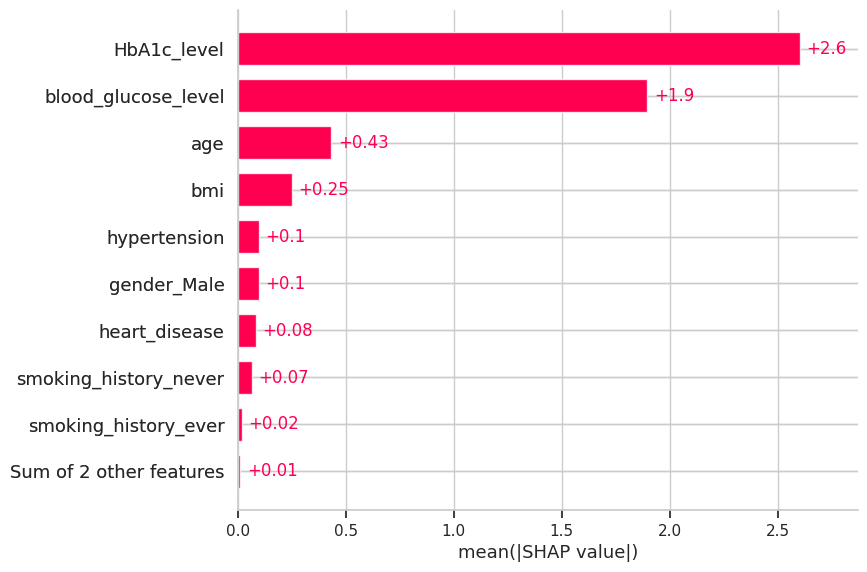

In [57]:
shap.plots.bar(shap_values)
